{1: 'building_windows_float_processed ', 2: 'building_windows_non_float_processed', 3: 'vehicle_windows_float_processed ', 5: 'containers', 6: 'tableware ', 7: 'headlamps'}


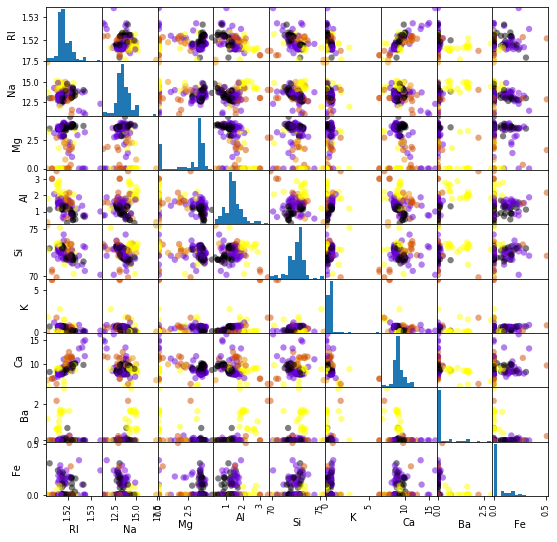

In [5]:
#!/usr/bin/env python
# coding: utf-8

# In[5]:


"""
Applied Machine Learning Project_1: Using kNN

COPYRIGHT (C) 2020 John Fahringer (jrf5001@yahoo.com) and Naomi Burhoe (naomi.burhoe@hotmail.com)
All rights reserved.

This program tries to classify a portion of our selected data set of
glass types using kNN.
"""

import pandas as pd
glass = pd.read_csv('data/glass.csv')
glass.head()


lookup_glass_name = dict(zip(glass.Type.unique(), glass.Type_Name.unique()))
print(lookup_glass_name)

X = glass[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = glass['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plotting a scatter matrix
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)


In [2]:
# In[2]:


# Create classifier object
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform')

# Train the classifier (fit the estimator) using the training data
knn.fit(X_train, y_train)

# Estimate the accuracy of the classifier on future data, using the test data
knn.score(X_test, y_test)




0.6296296296296297

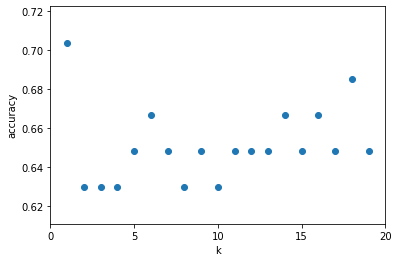

In [3]:
# In[3]:


# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])
plt.show()




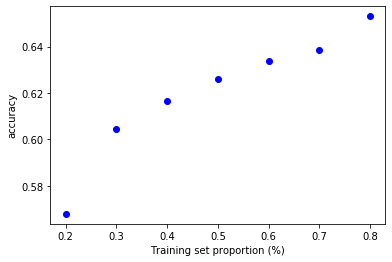

In [4]:
# In[4]:


# How sensitive is k-NN classification accuracy to the train/test split proportion?
import numpy as np
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors=5)
plt.figure()
for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')
plt.show()


# In[6]: